In [4]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [57]:
x, y = make_classification(n_samples = 400,
                          n_features = 20,
                          n_informative = 4,
                          random_state = 151)

In [58]:
y.shape

(400,)

In [59]:
## splitting 
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 124)

In [60]:
x_train.shape

(320, 20)

In [61]:
## model specification 
model = LogisticRegression()

In [62]:
model.get_params() #here we have the parameters. 
# max_iter: increase if we have complex data
# n_jobs: none --> parallel computing. n_jobs = 4 (if four cores), -1 will be n. of cores we have.
# tol: tolerance level. how small a number is interesting to make a change for. 
# most of the time if we scale we do not have to tune as much (the baseline will make sense)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [63]:
model

LogisticRegression()

In [64]:
model.fit(x_train, y_train)

LogisticRegression()

In [65]:
## predictions
model.predict(x_test) #giving us scores. 

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [66]:
## ground truth
y_test

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1])

In [67]:
## ROC
roc_auc_score(y_test, model.predict(x_test))

0.6754385964912281

In [68]:
 model.coef_ #syntax?

array([[ 0.18975291,  0.05641647,  0.01641995,  0.12216632,  0.04029916,
        -0.1101465 , -0.21317882,  0.06848383, -0.27824167, -0.16078026,
         0.20606751,  0.27544197, -0.03943314, -0.27858937, -0.48055369,
        -0.35523391,  0.10447132, -0.32142603,  0.08461445, -0.02057195]])

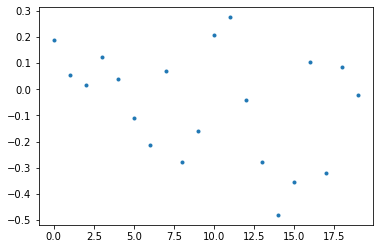

In [69]:
plt.plot(model.coef_[0], '.');

In [70]:
### re-run wiht L1 instead of L2: 
### hint: change solver to "saga"
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [78]:
## model specification 
model_l1 = LogisticRegression(solver = "saga",
                          penalty = "l1") 

In [79]:
model_l1.fit(x_train, y_train)

/home/victormp/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(penalty='l1', solver='saga')

In [80]:
## predictions
model_l1.predict(x_test) #giving us scores. 

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [81]:
## ROC
roc_auc_score(y_test, model_l1.predict(x_test)) #about the same ROC.

0.6754385964912281

In [82]:
 model_l1.coef_ #syntax. 

array([[ 0.17794852,  0.04290975,  0.        ,  0.        ,  0.01652494,
        -0.08832568, -0.19571694,  0.04951637, -0.33966612, -0.14231966,
         0.18527902,  0.25167541, -0.02349668, -0.2644167 , -0.48127317,
        -0.31622314,  0.06088169, -0.32425897,  0.06595457, -0.00514729]])

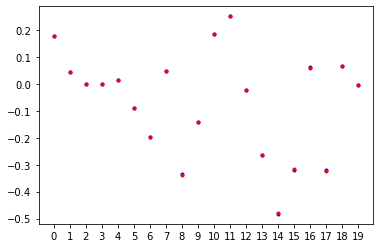

In [83]:
plt.plot(model.coef_[0], '.b');
plt.plot(model_l1.coef_[0], '.r');
plt.xticks(np.arange(0, 20)); ##hm should differ more. 

In [84]:
x.std()

1.2041858878777645

In [85]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [86]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

In [87]:
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [88]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [89]:
roc_auc_score(y_test, pipeline.predict(x_test))

0.6754385964912281

In [90]:
from sklearn.model_selection import (StratifiedShuffleSplit, 
                                     cross_val_score)

In [91]:
cv = StratifiedShuffleSplit(n_splits = 5,
                           test_size = 0.2, 
                           random_state = 42)

In [93]:
cv.split(x, y) #generator

<generator object BaseShuffleSplit.split at 0x7ff792f00cf0>

In [96]:
for train_idx, test_idx in cv.split(x, y): 
    print(test_idx)

[130 112 204 374 308  95  90 202 386 375 250 247  86  41 189 376  98 194
  85 378 243 199 280 155 393 198 320 322 106 354 313 231  28 259  39 297
 186 351 292  69 257 205  51 174 287  87 264 104   1  19 327 303 256 315
 290   5 133 116 211 157 113 156 203 158 336 399 245 190 350 364 396 232
 286 357 173 363 346 154 261 258]
[354 245 249 305  39 341 288  34 272 142 307 285  16   0 128 302 199 383
 360 240 262 294 160 326 175 381  66 271 137 163 380 221 243  85 338 113
 268 392 193 140  73 169 166  93 174 115  80 378 391 301 177 314  46 300
 369  89  84  68 181  79  33 321  48 110  41 102   7 211 287  83 388  86
 131  90 144  64 323 152 348 204]
[331 329 348 266 302 113  17 306 296 125 207 111 132  80 128   5 203 317
 374  68 248 362 182 381 288  30 238 155  92  16  70 352 298 380  52  25
 378 181 236 218 212 107 314  82 273 242 234 123 118 173 291 271 268 269
 225 283  18  97 392  67 115 213   9  99 127 254  88  54  44  41 139 184
 396 190 303 290 120 176 322  33]
[286 295 223 119 107 2

In [97]:
scores = cross_val_score(pipeline, x, y, cv = cv,
                        scoring = "roc_auc")

In [98]:
scores

array([0.761875, 0.83    , 0.72875 , 0.838125, 0.75625 ])

In [99]:
scores.mean()

0.7829999999999999

In [100]:
stdscl = StandardScaler()

In [101]:
stdscl.fit(x)

StandardScaler()

In [103]:
stdscl.mean_

array([ 0.05951247,  0.03569352,  0.0152304 ,  0.03542221, -0.0510364 ,
        0.05406544,  0.03281712, -0.00831163, -0.35890236, -0.04615156,
       -0.00182322,  0.08590233,  0.12246445, -0.03510756,  0.47368918,
       -0.55117362, -0.02174652,  0.04454702, -0.03843285, -0.05720594])